# Análise Exploratória de Dados - German Risk Credit Dataset

## Introdução

<img src="https://static.tildacdn.com/tild6237-3363-4339-a563-393632306632/istockphoto-11521639.jpg" width="400">

O dataset a ser explorado se trata de um conjunto de dados com o perfil de clientes que solicitaram empréstimo de um banco alemão.

Quando o banco recebe uma proposta de empréstimo, precisa decidir se aprova ou não esse empréstimo. Existem dois tipos de riscos que o banco corre nesse tipo de validação:

1) Se o solicitante é um adimplente, ou seja, se é muito provável que ele pague a dívida, então não aprovar o empréstimo resulta em perda financeira para o banco.

2) Se o solicitante é um inadimplente, ou seja, se é muito provável que ele não pague a dívida, então aprovar o empréstimo rsulta em perda financeira para o banco.

Existe uma classificação no próprio dataset informando se aquele perfil é um bom pagador ou não ("Creditability"). Porém, não se sabe se é uma classificação feita pelos gerentes do banco, ou se é o resultado final do empréstimo, a fonte do dataset não deixa isso claro.

De qualquer forma, vamos explorar os dados ...



## Descrição da Base de Dados

In [1]:
# Carregando as bibliotecas necessárias para o processamento
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregando o dataset na memória
df = pd.read_csv('german_credit.csv')

In [3]:
#Verificando as colunas
df.info()
print('\nDuplicatas ? ->', df.duplicated()[df.duplicated() == True])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

>Podemos verificar que existem 21 colunas no dataset sendo 1 dessas colunas a classificação de crédito e 1000 linhas.
Ou seja, temos 1000 perfis de clientes, 20 caracterísiticas distintas e nenhum cliente com valor nulo em alguma característica.

>Também não possuímos nenhuma duplicata.

In [4]:
# Dando uma olhada nos valores das caracterísitcas
pd.concat([df.head(), df.tail()])

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1
999,0,1,30,2,2,6350,5,5,4,3,...,4,2,31,3,2,1,3,1,1,1


>Pelo nome das colunas, existem valores em que seria esperado uma descrição, ou valor descritivo ao invés de um inteiro representativo. Felizmente, em uma das fontes do dataset é possível encontrar um dicionário com a relação entre o valor inteiro e o que ele representa, conforme pode ser visualizado a seguir:

<div align="center">
    <img src="dictionary.png" width="800" align="middle">
</div>

## Processamento

Algumas características são de maior interesse na nossa análise do que outras, portanto, vamos transformar o dado representativo para o descritivo em algumas características para uma melhor visualização posterior. 

O dataset não possuem duplicatas nem valores nulos a serem tratados. 

In [5]:
df['Gender'] = df['Sex & Marital Status'].map({1: 'Male', 2: 'Male', 3: 'Male', 4: 'Female'})
df['Credit Analysis'] = df['Creditability'].map({0: 'Bad Credit', 1: 'Good Credit'})
df['Purpose_label'] = df['Purpose'].map({1: 'New car', 2: 'Used car', 3: 'Furniture', 4: 'Radio/TV', 5: 'Home appliances',
                  6: 'Repairs', 7: 'Education', 8: 'Vacations', 9: 'Recycling', 10: 'Business admin', 0: 'Other'})

age_bins = [0, 25, 39, 59, 64, 100]
age_labels = ['0 <=...<= 25', '26<=...<39', '40<=...<=59', '60<=...<=64', '>=65']
df['Age Group'] = pd.cut(df['Age (years)'], bins=age_bins, labels=age_labels)



df[['Credit Analysis','Gender','Age Group','Purpose_label']].head(10)

,Credit Analysis,Gender,Age Group,Purpose_label
0,Good Credit,Male,0 <=...<= 25,Used car
1,Good Credit,Male,26<=...<39,Other
2,Good Credit,Male,0 <=...<= 25,Recycling
3,Good Credit,Male,26<=...<39,Other
4,Good Credit,Male,26<=...<39,Other
5,Good Credit,Male,40<=...<=59,Other
6,Good Credit,Male,26<=...<39,Other
7,Good Credit,Male,40<=...<=59,Other
8,Good Credit,Male,>=65,Furniture
9,Good Credit,Male,0 <=...<= 25,Furniture


## Análise Exploratória

A principal característica de cada solicitante no dataset é se ele é considerado adimplente ou inadimplente, vamos verificar qual é a proporção dentre essas opções.

In [20]:
print(df['Credit Analysis'].unique()) # Confirma que só existem 2 tipos de perfil de crédito, o bom pagador e o não pagador
good = (df['Credit Analysis'] == 'Good Credit').sum()
bad = 1000 - good #Sabe-se pela descrição da base de dados que 1000 é o total de perfis
print('Proporções de perfil de crédito:')
print(f'Adimplentes: {((good/1000)*100):.2f} %')
print(f'Inadimplentes: {((bad/1000)*100):.2f} %')

['Good Credit' 'Bad Credit']
Proporções de perfil de crédito:
Adimplentes: 70.00 %
Inadimplentes: 30.00 %


> Na categoria de gênero, existem 3 representações diferentes para homens e uma para mulher. Provavelmente existam mais homens que mulheres no dataset, vamos conferir as proporções:

In [24]:
print(df['Gender'].unique()) #Confirma que só existem 2 gêneros diferentes no dataset

male_count = (df['Gender'] == 'Male').sum()
female_count = 1000 - male_count
print('Proporções de gênero na base:')
print(f'Homens: {((male_count/1000)*100):.2f} %')
print(f'Mulheres: {((female_count/1000)*100):.2f} %')

['Male' 'Female']
Proporções de gênero na base:
Homens: 90.80 %
Mulheres: 9.20 %


> De fato, as proporção de mulheres é bem inferior ao dos homens no dataset. Porque será ? Seria essa proporção um recorte não representativo ou um indicativo, no período desconhecido contemplado pelo dataset, de que mulheres solicitam menos emprestimo do que os homens ? Não é possível responder essas perguntas, mas já que estamos falando de gênero e de análise de crédito, uma pergunta naturalmente surge... qual gênero tem mais perfis adimplentes e inadimplentes ? Vamos verificar !

In [38]:
gc_male = ((df['Gender'] == 'Male') & (df['Credit Analysis'] == 'Good Credit')).sum()
gc_female = ((df['Gender'] == 'Female') & (df['Credit Analysis'] == 'Good Credit')).sum()

print('Proporção de adimplentes por gênero:')
print(f'Homens: {((gc_male/male_count)*100):.2f} %')
print(f'Mulheres: {((gc_female/female_count)*100):.2f} %')

Proporção de adimplentes por gênero:
Homens: 69.71 %
Mulheres: 72.83 %


> Apesar de uma leve diferença positiva no número de adimplentes do gênero feminino, dado a diferença entre a quantidade de registros de ambos os gêneros, é uma diferença muito baixa para concluir que as mulheres no geral vão sempre ser pagadoras melhores que os homens, o que se pode dizer é que as mulheres registradas no dataset possuem proporcionalmente mais quantidades de adimplentes que os homens.

> Agora, vamos dar uma olhada nos propósitos pelos quais as pessoas tomam crédito e quais suas relações com gênero e adimplencia.

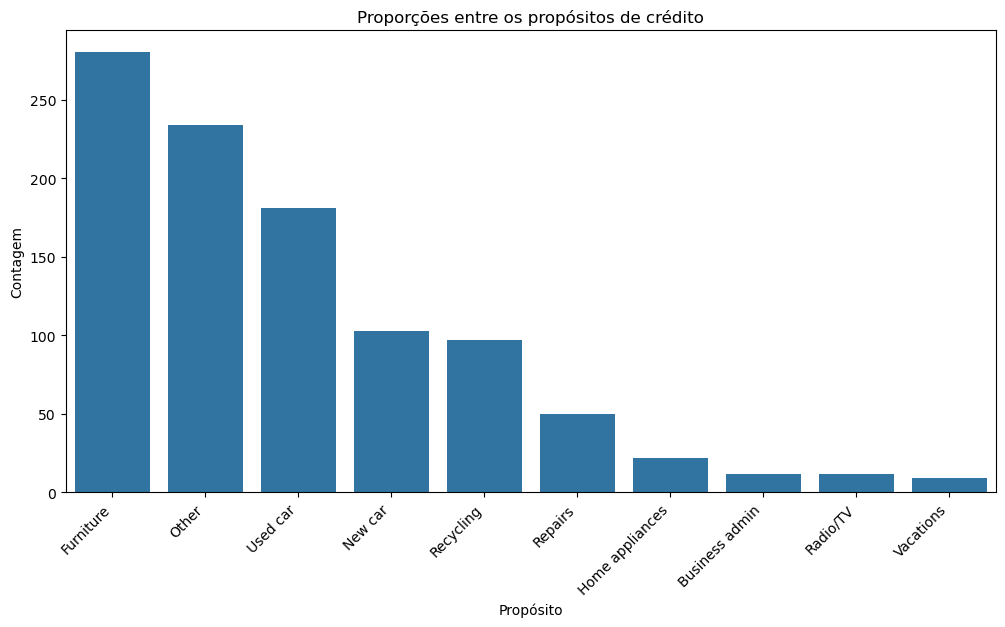

In [39]:
# Plotando as proporções dos propósitos
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Purpose_label', order=df['Purpose_label'].value_counts().index)
plt.title('Proporções entre os propósitos de crédito')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Contagem')
plt.xlabel('Propósito')
plt.show()

In [48]:
top3_purposes = df['Purpose_label'].isin(['Furniture', 'Other', 'Used car']).sum()
print(f'Proporção do top 3: {((top3_purposes/1000)*100):.2f} %')

Proporção do top 3: 69.50 %


> Dentre os propósitos pelos quais as pessoas do dataset tomam crédito, os 3 primeiros correspondem a quase 70% dos motivos registrados, sendo eles: Mobília, Outros, e Carro Usado. O propósito 'Outro' deve englobar vários motivos pelos quais não correspondem a nenhuma das outras opções, o que indica uma grande variedade de motivos além dos presentes no dataset. Nota-se também, fato curioso, que existem mais tomadores de crédito para adquirir um carro usado do que um novo.

> Será que a proporção desses motivos mudam em relação ao gênero do tomador de crédito ? Vamos verificar

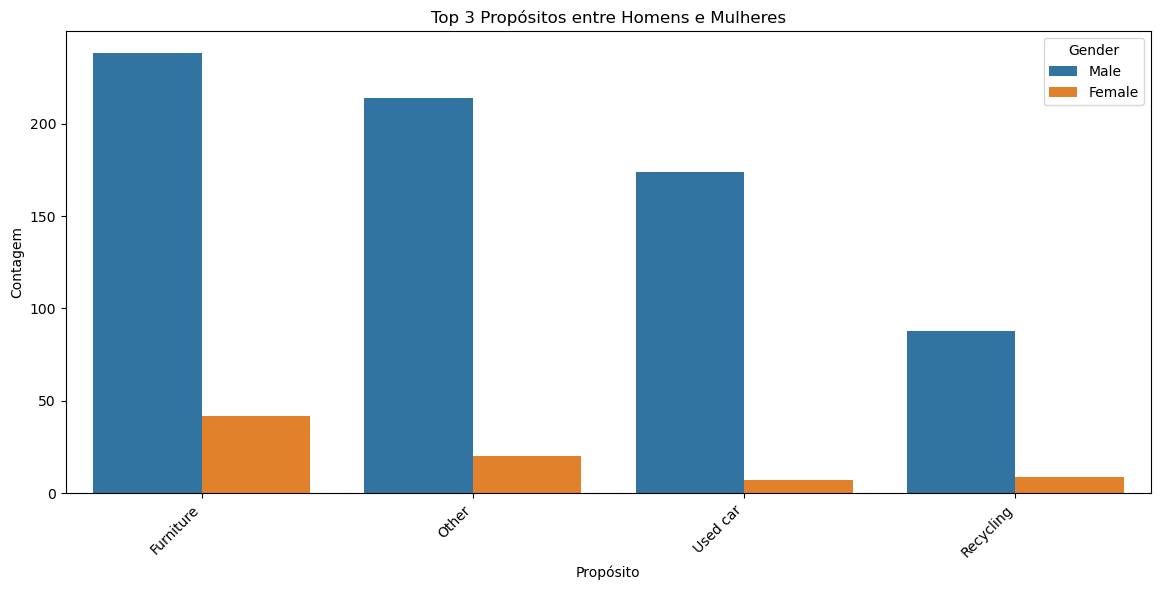

In [55]:
# Filtrar os top 3 propósitos para cada gênero
top_male_purposes = df[df['Gender'] == 'Male']['Purpose_label'].value_counts().nlargest(3).index
top_female_purposes = df[df['Gender'] == 'Female']['Purpose_label'].value_counts().nlargest(3).index

# Filtrar o DataFrame para conter apenas esses propósitos
top_purposes = df[(df['Purpose_label'].isin(top_male_purposes)) | (df['Purpose_label'].isin(top_female_purposes))]

# Gráfico lado a lado dos top 3 propósitos para homens e mulheres
plt.figure(figsize=(14, 6))
sns.countplot(data=top_purposes, x='Purpose_label', hue='Gender', order=top_purposes['Purpose_label'].value_counts().index)
plt.title('Top 3 Propósitos entre Homens e Mulheres')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Contagem')
plt.xlabel('Propósito')
plt.show()

Top 3 diferenças entre adimplentes e inadimplentes 

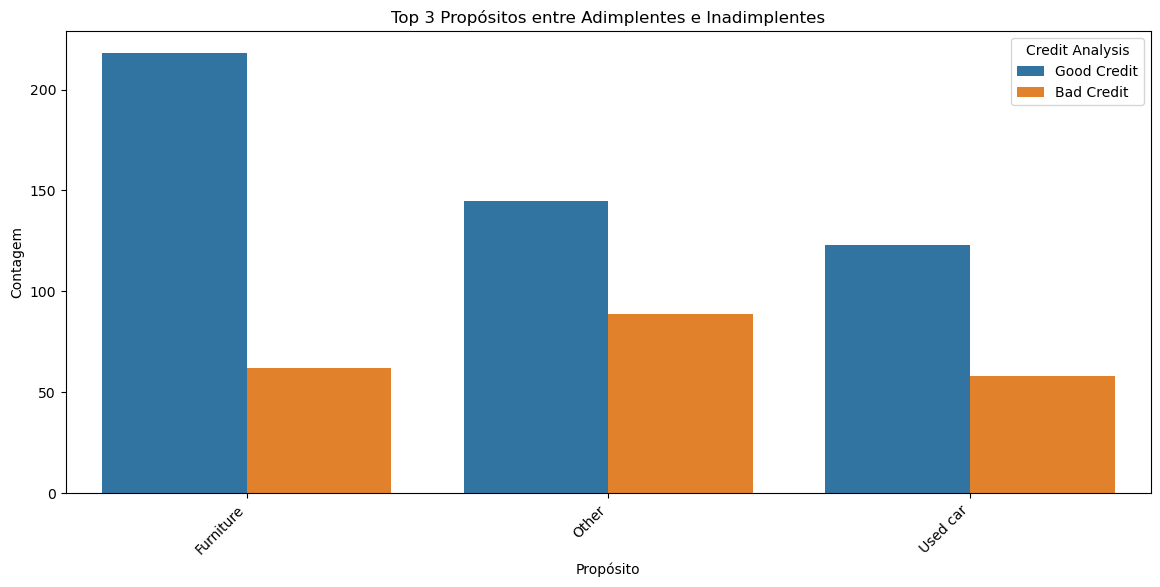

In [56]:
# Filtrar os top 3 propósitos para cada perfil de crédito
top_good_credit = df[df['Credit Analysis'] == 'Good Credit']['Purpose_label'].value_counts().nlargest(3).index
top_bad_credit = df[df['Credit Analysis'] == 'Bad Credit']['Purpose_label'].value_counts().nlargest(3).index

# Filtrar o DataFrame para conter apenas esses propósitos
top_credit_purposes = df[(df['Purpose_label'].isin(top_good_credit)) | (df['Purpose_label'].isin(top_bad_credit))]

# Gráfico lado a lado dos top 3 propósitos para adimplentes e inadimplentes
plt.figure(figsize=(14, 6))
sns.countplot(data=top_credit_purposes, x='Purpose_label', hue='Credit Analysis', order=top_credit_purposes['Purpose_label'].value_counts().index)
plt.title('Top 3 Propósitos entre Adimplentes e Inadimplentes')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Contagem')
plt.xlabel('Propósito')
plt.show()

Proporção faixa etária

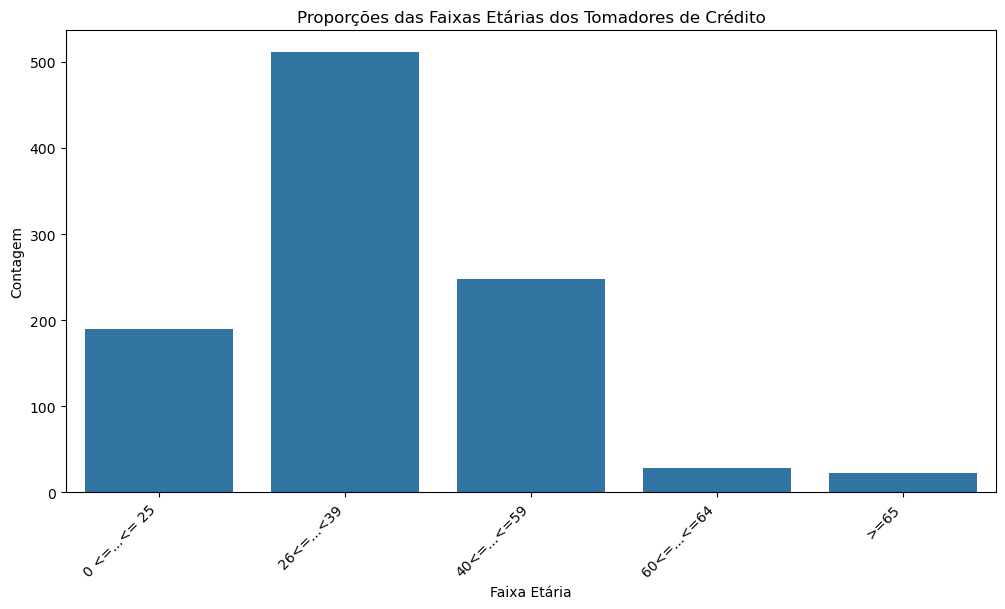

In [58]:
# Gráfico das proporções das faixas etárias na ordem desejada
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age Group', order=age_labels)
plt.title('Proporções das Faixas Etárias dos Tomadores de Crédito')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Contagem')
plt.xlabel('Faixa Etária')
plt.show()


Adimplencia e Inadinplencia por faixa etária

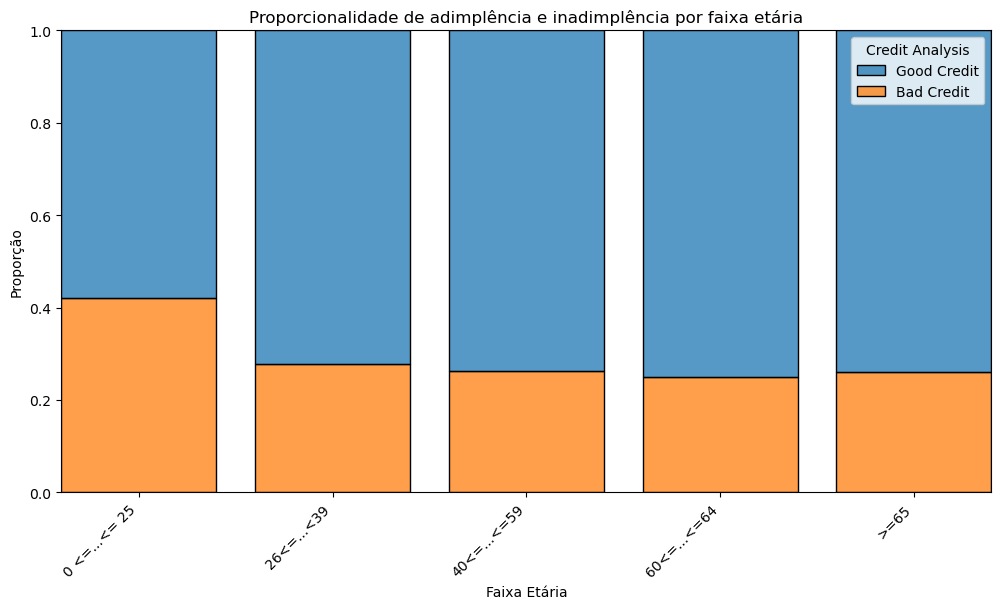

In [64]:
# Comparação proporcional entre adimplentes e inadimplentes por faixa etária
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age Group', hue='Credit Analysis', multiple='fill', shrink=0.8)
plt.title('Proporcionalidade de adimplência e inadimplência por faixa etária')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proporção')
plt.xlabel('Faixa Etária')
plt.show()
